In [ ]:
import numpy as np
from collections import Counter
import math, random

all_digits = {
    2: list(range(1, 5)),
    3: list(range(1, 10)),
    4: [str(x) for x in list(range(1, 10)) + list("ABCDEFG")],
    5: [str(x) for x in list(range(1, 10)) + list("ABCDEFGHIJKLMNO")]
}

def available_numbers(n, taken):
    """Return remaining numbers available given filled cells."""
    master = all_digits[n]
    master_arr = np.array(master * (n**2))
    clue_arr = taken
    clueCount = Counter(clue_arr)
    fullCount = Counter(master_arr)
    remainCount = fullCount - clueCount
    result = np.array([val for val, cnt in remainCount.items() for _ in range(cnt)])
    return result


class SimulatedAnnealing:
    def __init__(self, sudoku_init, t_sched=None, t_init=10):
        self.sudoku = sudoku_init
        self.grid = np.array(sudoku_init.board)
        self.fixed = np.array(sudoku_init.fixed)
        self.length = sudoku_init.length  # total grid size (e.g., 9, 16, 25)
        self.n = int(math.sqrt(self.length))  # subgrid dimension (3, 4, 5)
        
        self.possible_numbers = available_numbers(self.n, self.grid.flatten())
        self.populate()
        
        self.T_init = t_init
        self.T = self.T_init
        self.iters = 1
        self.decay = 0.9999 if t_sched is None else t_sched
        self.error_count = 99999999
        self.T_min = 1e-7
        
        self.num_goodswaps = 0
        self.num_badswaps = 0
        self.num_rejectedswaps = 0
        
    def populate(self):
        """Fill each subgrid with random non-fixed values."""
        for box_row in range(self.n):
            for box_col in range(self.n):
                numbers = set(all_digits[self.n])
                for r in range(self.n * box_row, self.n * box_row + self.n):
                    for c in range(self.n * box_col, self.n * box_col + self.n):
                        if self.fixed[r][c]:
                            numbers.discard(self.grid[r][c])
                for r in range(self.n * box_row, self.n * box_row + self.n):
                    for c in range(self.n * box_col, self.n * box_col + self.n):
                        if not self.fixed[r][c]:
                            self.grid[r][c] = numbers.pop()
                        
    def swap(self):
        """Swap two unfixed cells in a random subgrid and apply simulated annealing acceptance."""
        box = random.randint(0, self.n**2 - 1)
        row_start, col_start = self.n * (box // self.n), self.n * (box % self.n)
        candidates = [
            (r, c)
            for r in range(row_start, row_start + self.n)
            for c in range(col_start, col_start + self.n)
            if not self.fixed[r][c]
        ]
        if len(candidates) < 2:
            return self.swap()
        (r1, c1), (r2, c2) = random.sample(candidates, 2)
        self.grid[r1][c1], self.grid[r2][c2] = self.grid[r2][c2], self.grid[r1][c1]
        
        currErr = self.error_count
        newErr = self.sudoku.numErrors(grid=self.grid.tolist())
        delta = newErr - currErr
        
        if delta < 0:
            self.sudoku.board = self.grid.tolist()
            self.error_count = newErr
            self.num_goodswaps += 1
        else:
            prob = math.exp(-delta / self.T)
            if random.random() < prob:
                self.sudoku.board = self.grid.tolist()
                self.error_count = newErr
                self.num_badswaps += 1
            else:
                self.grid[r1][c1], self.grid[r2][c2] = self.grid[r2][c2], self.grid[r1][c1]
                self.num_rejectedswaps += 1
        
        self.iters += 1
        self.T *= self.decay

    def solve(self, display=False):
        while self.error_count > 0:
            self.swap()
            if self.iters % 1000 == 0 and display:
                print(f"Iter {self.iters}, Errors {self.error_count}, Temp {self.T:.4f}")
            if self.iters % 20000 == 0:
                self.T *= 1.05
            if self.iters % 80000 == 0:
                self.T = 5
        print(f"Solved in {self.iters} iterations.")
        return self.iters


In [2]:
import Sudoku

board1 = Sudoku.Sudoku(3)
digitString = "070000043040009610800634900094052000358460020000800530080070091902100005007040802"
board1.fillFromString(digitString)
x = SimulatedAnnealing(board1)
x.solve()

✅ Solved in 27987 iterations.


27987

In [10]:
import Dataloader
import numpy as np

num = 1000

data = Dataloader.make_dataset('sudoku.csv', limit=num)
iters = []

for sod in data:
    puzzle = sod[0]
    solver = SimulatedAnnealing(puzzle)
    iters.append( solver.solve())
    
print('Average number of iters was: ', np.mean(iters))
print('Median number of iters was: ', np.median(iters))
    


number of iterations:  27292
number of iterations:  26348
number of iterations:  27889
number of iterations:  29131
number of iterations:  26898
number of iterations:  30608
number of iterations:  24991
number of iterations:  31468
number of iterations:  31668
number of iterations:  35728
number of iterations:  26732
number of iterations:  30756
number of iterations:  31760
number of iterations:  37650
number of iterations:  30588
number of iterations:  35700
number of iterations:  28306
number of iterations:  28113
number of iterations:  28414
number of iterations:  31987
number of iterations:  35716
number of iterations:  328991
number of iterations:  17687
number of iterations:  29688
number of iterations:  26044
number of iterations:  30782
number of iterations:  39693
number of iterations:  33780
number of iterations:  30015
number of iterations:  41789
number of iterations:  29437
number of iterations:  32143
number of iterations:  33401
number of iterations:  32878
number of ite

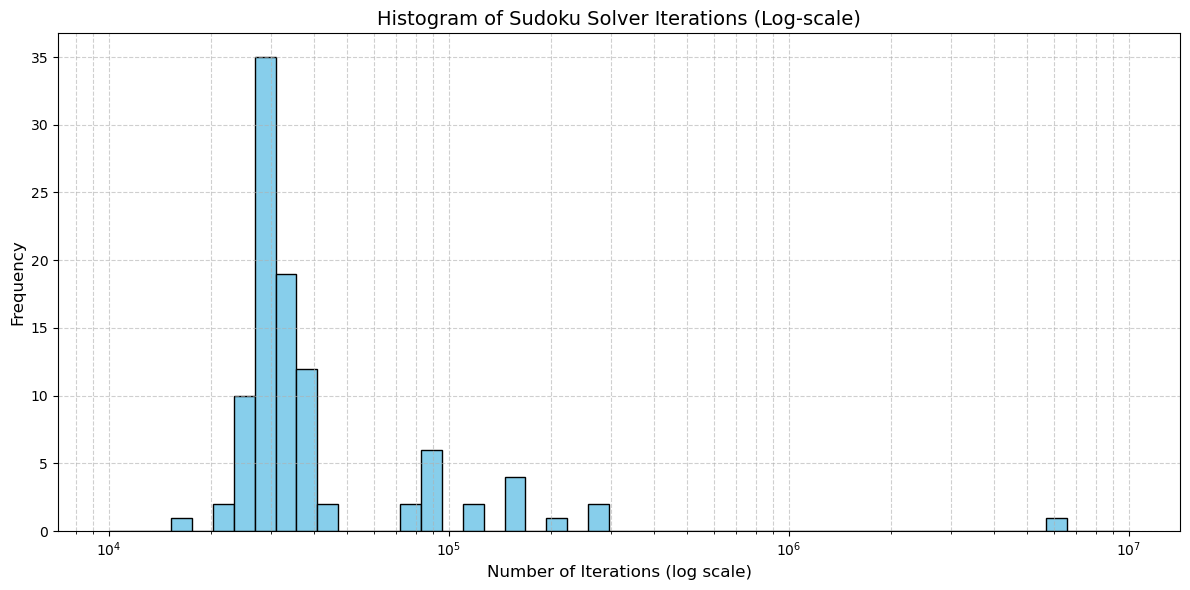

In [6]:
import matplotlib.pyplot as plt
import numpy as np

iterations = np.array([
    29699,32159,29271,29524,29041,43156,24516,30410,31400,42104,27822,27959,
    36001,28995,31077,38124,30117,31160,26334,39233,33841,148097,16310,34015,
    31998,29163,29976,150128,30326,6146457,26209,28224,114789,28869,34501,
    83057,24594,32230,28126,148658,29890,34585,39011,29948,29576,208507,35659,
    34451,86662,29636,27635,32376,87771,30158,30521,21958,29121,37968,38126,
    265986,36052,30912,83382,83479,112984,25775,81986,29476,28373,30851,32264,
    29420,20698,29995,29838,38441,37439,29587,25339,32771,32281,154321,34304,
    8346,34878,29706,33648,30203,26062,81362,36531,27606,92109,28669,26741,
    263747,25218,27834,25723,39342
])

# Define log-spaced bins from 10^4 to 10^7
bins = np.logspace(4, 7, 50)  # 50 bins between 10^4 and 10^7

plt.figure(figsize=(12,6))
plt.hist(iterations, bins=bins, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Histogram of Sudoku Solver Iterations (Log-scale)', fontsize=14)
plt.xlabel('Number of Iterations (log scale)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, which="both", linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
